In [3]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
from matplotlib import pyplot as plt
import pandas as pd
from wordcloud import WordCloud
from uuid import uuid4


# Extends pandas txt accessor]
from utils import TextAccessor

In [20]:
csv = Path().cwd().parent/"Clean/all.csv"
df = pd.read_csv(str(csv))

In [9]:
csv_rentas = Path().cwd().parent/"Datasets/Scrapper/Nestle"
rentas = csv_rentas.glob("**/*.csv")
values = pd.concat([pd.read_csv(str(renta)) for renta in rentas])

In [11]:
values.drop_duplicates(subset=["title"], inplace=True)

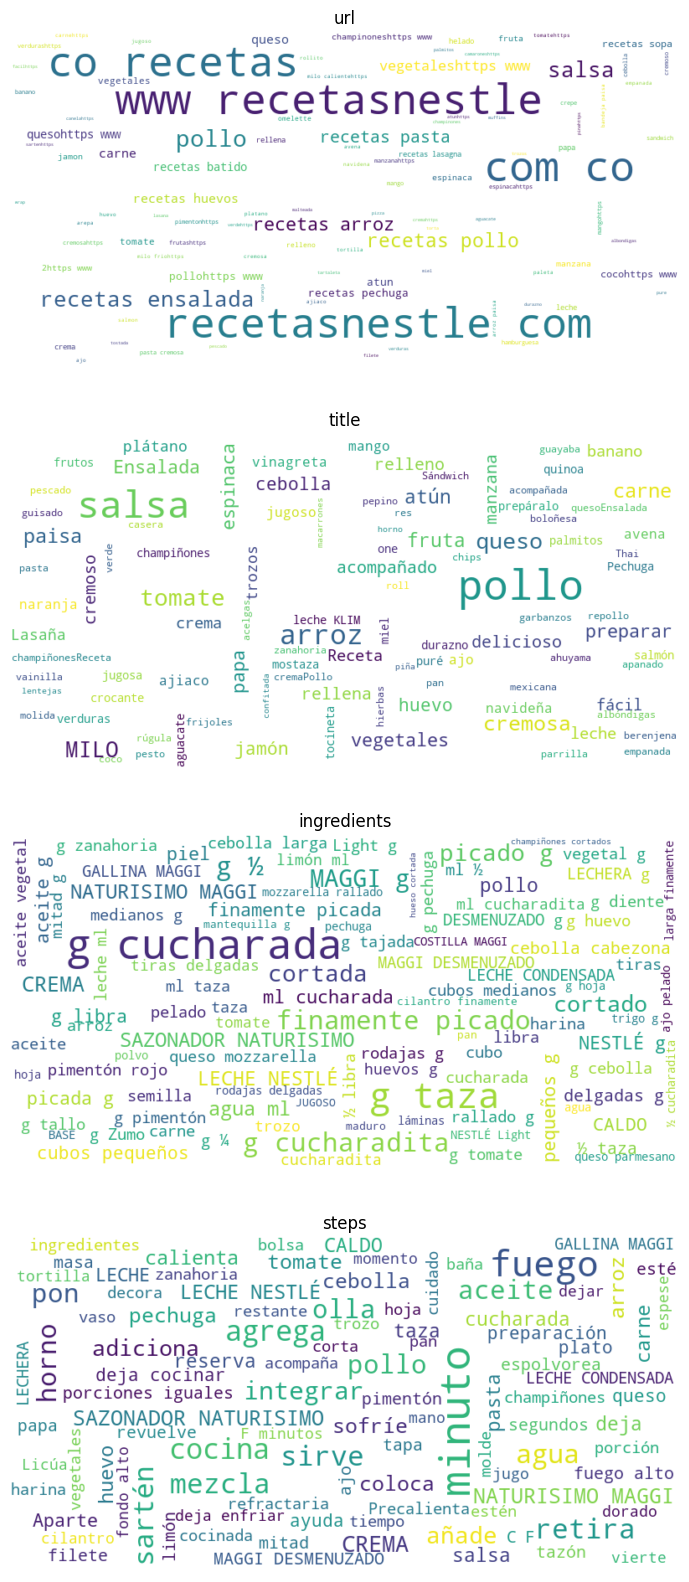

In [13]:
values.utils_text.plot_word_cloud()

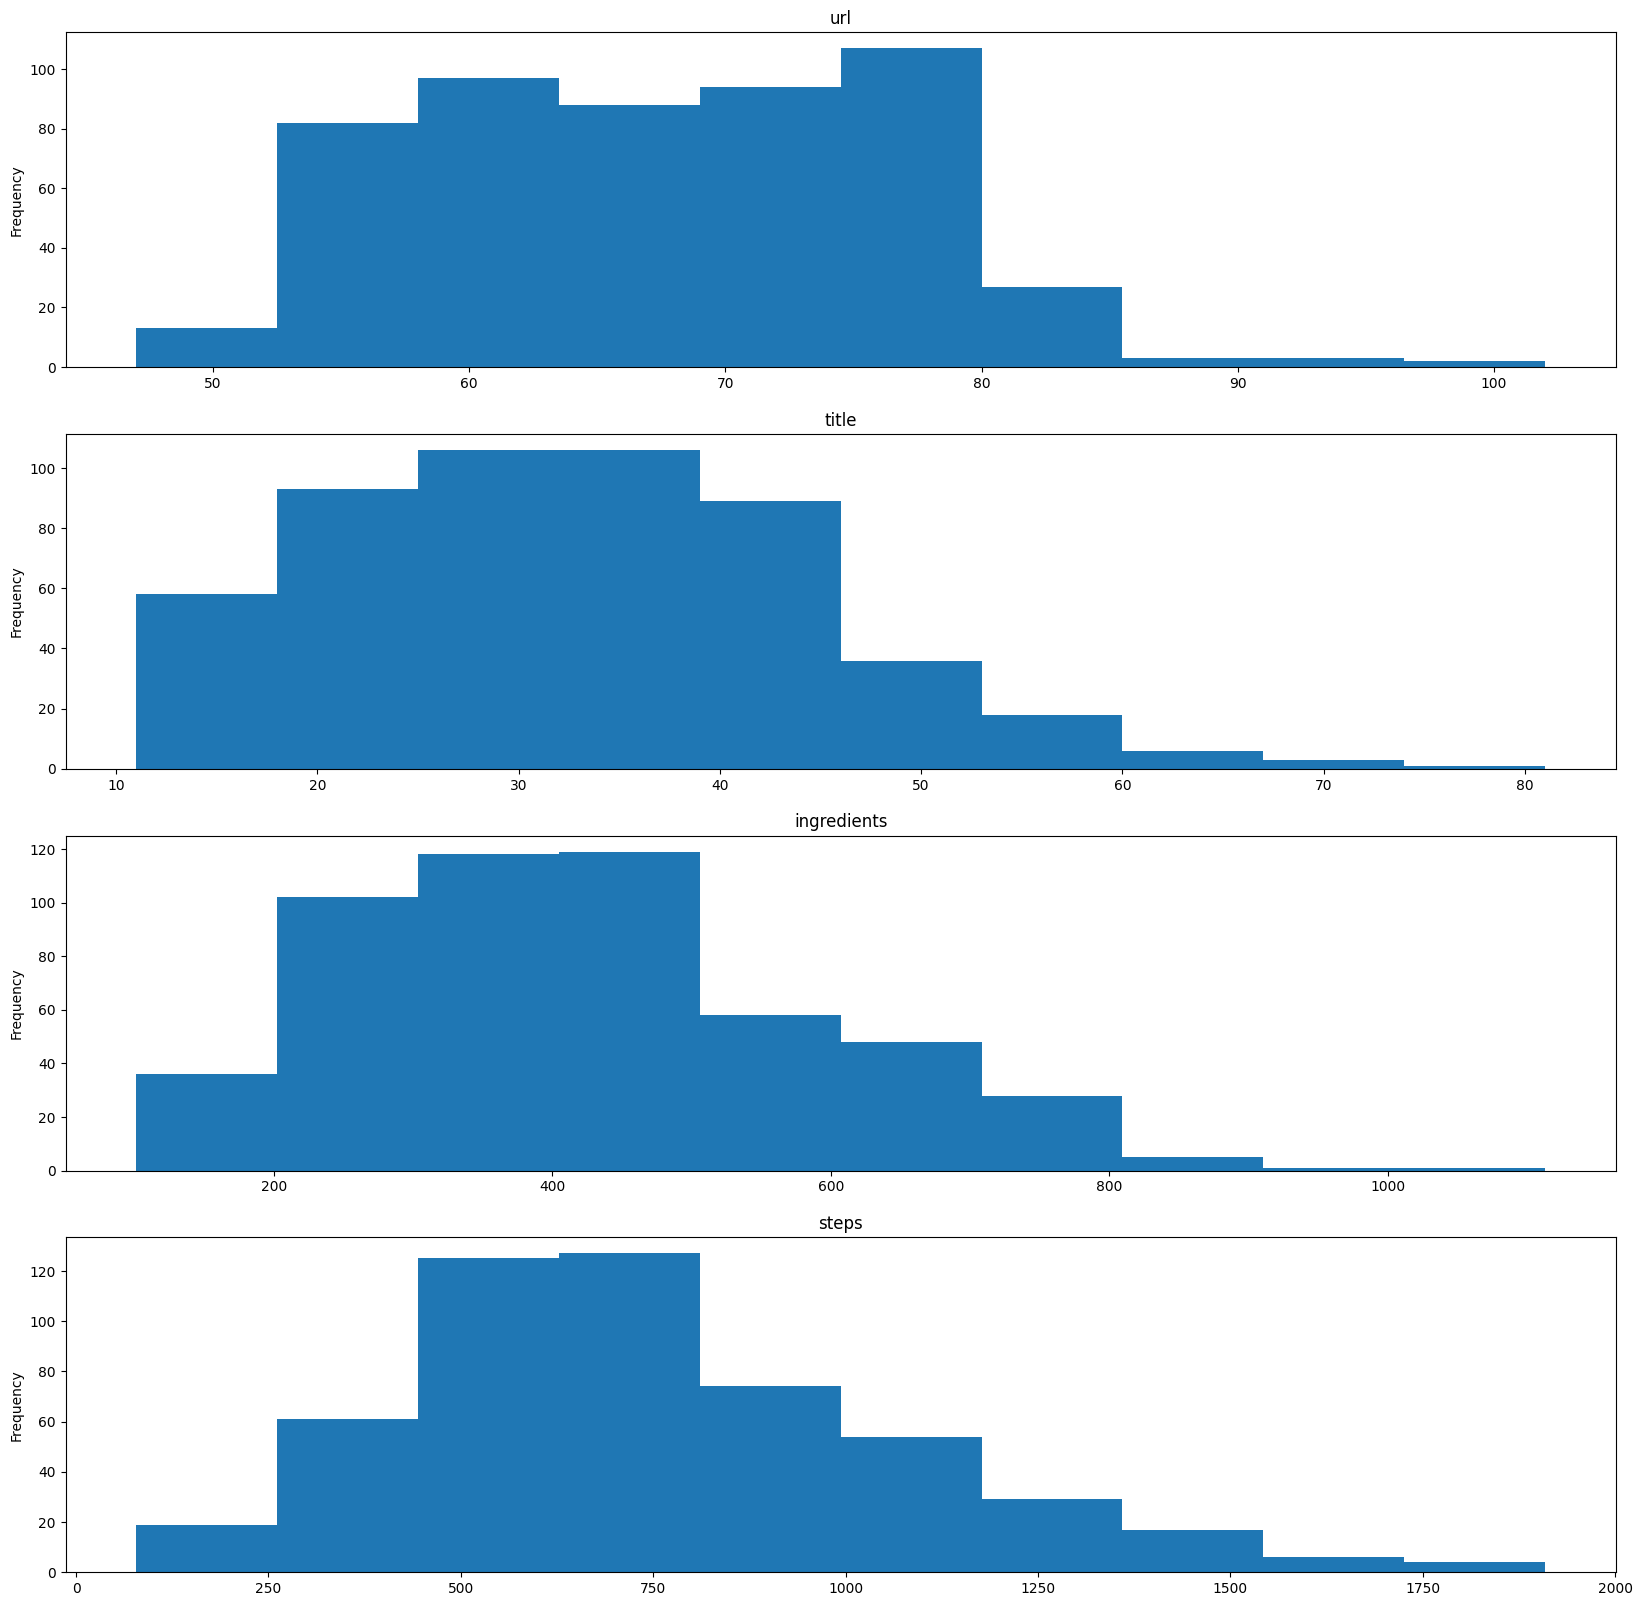

In [14]:
values.utils_text.plot_length_text()

In [15]:
values["uuid"] = values["title"].apply(lambda x: uuid4())

In [18]:
values = values[["uuid", "title", "ingredients", "steps"]]

In [21]:
pd.concat([df, values]).to_csv(str(csv), index=False)